### Question 3: Purchasing Insurance

### Import Libraries

In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

### Load Data

In [44]:
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")

### Statistical Analysis of Numerical Features

In [3]:
Caravan_train.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,...,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,24.312311,1.110367,2.680130,2.994600,5.784449,0.700648,4.608855,1.083369,3.267603,6.180562,...,0.075594,0.005400,0.006695,0.004752,0.563499,0.000648,0.006911,0.030886,0.007127,0.014471
std,12.777356,0.407481,0.789769,0.816876,2.843619,1.000874,1.711451,1.016798,1.584479,1.907963,...,0.377466,0.073291,0.081560,0.077629,0.568267,0.025449,0.085424,0.209198,0.084132,0.121229
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,1.000000,2.000000


### Preprocessing the Dataset

In [4]:
Caravan_train["Purchase"]=Caravan_train["Purchase"].astype("category")
Caravan_train["Purchase_cat"]=Caravan_train["Purchase"].cat.codes
Caravan_train.dtypes.head(3)

MOSTYPE     int64
MAANTHUI    int64
MGEMOMV     int64
dtype: object

In [5]:
Caravan_train=Caravan_train.select_dtypes(include=['uint8','int64','int8']).copy();Caravan_train.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase_cat
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


### Train and Test Datasets

In [6]:
#Purchase_cat as the response variables
y_Caravan_train=Caravan_train['Purchase_cat']
y_Caravan_train.shape

(4630,)

In [7]:
#all variables except Purchase_cat
X_Caravan_train=Caravan_train.drop('Purchase_cat',axis=1)
Caravan_train.shape

(4630, 86)

In [8]:
#dividing dataset into 25% being testing and 75% being training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Caravan_train, y_Caravan_train,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3472, 85)
X_test shape: (1158, 85)
y_train shape: (3472,)
y_test shape: (1158,)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### k-Nearest Neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 0 ... 0 0 0]


In [12]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.92


In [13]:
#roc curve
y_model = clf.predict(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_model)

0.5165120071327178

### Analyzing KNeighborsClassifier

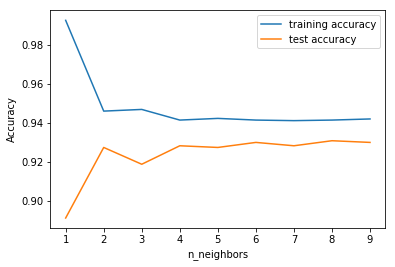

In [14]:
#with a range from 1 to 10, the test accuracy is high when n_neighbors is at 8
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.1234887737478411

In [17]:
#roc curve 
roc_auc_score(y_test,y_model)

0.5120599242148731

### Logistic Regression

In [18]:
#given c=1, c=100, and c=0.01, the test score and roc curse for the logistic regression are approximately the same
logreg = LogisticRegression().fit(X_train, y_train)
y_model = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.942
Test set score: 0.929


In [19]:
#roc curve
roc_auc_score(y_test,y_model)

0.4986098239110287

In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_model = logreg100.predict(X_test)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.941
Test set score: 0.926


In [21]:
#roc curve
roc_auc_score(y_test,y_model)

0.49675625579240035

In [22]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.941
Test set score: 0.932


In [23]:
#roc curve
roc_auc_score(y_test,y_model)

0.5

### Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_model = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.884


In [83]:
#roc curve
roc_auc_score(y_test,y_model)

0.539036379207189

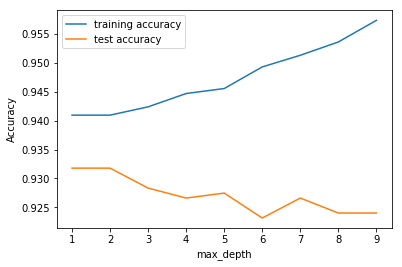

In [25]:
#for a given range from 1 to 10, the test accuracy of the Decision Tree is high when max_depth is at 2
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
max_depth_settings = range(1, 10)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_model = forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.921


In [27]:
#roc curve
roc_auc_score(y_test,y_model)

0.5115730692976385

### SVC

In [28]:
#the output of SVC takes sometime

#from sklearn.svm import SVC
#svc = SVC()
#svc.fit(X_train, y_train)
#y_model = logreg001.predict(X_test)
#print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
#print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [29]:
#roc curve
#y_model = model.predict(X_test)
#roc_auc_score(y_test,y_model)

### Neural Networks

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_model = logreg001.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.93


In [31]:
#roc curve
roc_auc_score(y_test,y_model)

0.5

### Summary 

In [32]:
decision=pd.DataFrame({'Model':['k-Nearest Neighbor','Naive Bayes','logreg','logreg100','logreg0.01','Decision Tree','Random Forest',
                              'Neural Networks'],'Test':[.92,.12,.93,.93,.93,.88,.92,.93],'ROC':[.52,.51,.50,.50,.50,.54,.51,.50]})
decision


,Model,ROC,Test
0,k-Nearest Neighbor,0.52,0.92
1,Naive Bayes,0.51,0.12
2,logreg,0.50,0.93
3,logreg100,0.50,0.93
4,logreg0.01,0.50,0.93
5,Decision Tree,0.54,0.88
6,Random Forest,0.51,0.92
7,Neural Networks,0.50,0.93


In [33]:
# From the table above, both logistic regression and Neural Networks had the higest test accuracy (0.93)
# But Decision Tree had the highest Roc_curve (0.54)
# Hence, we assume at this point using the Decision Tree as a model for prediction caravan insurance policy since 
# we are much interested in the area under the curve (i.e roc_curve)

### Predicting caravan insurance policy

In [34]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv");Caravan_unk.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0


In [35]:
#probs=tree.predict_proba(Caravan_unk)[:,1] #predicting purchase using the decision tree had awkward probs (just 1's & 0's)
probs=forest.predict_proba(Caravan_unk)[:,1] # now we assume predicting purcahse using random forest
probs

array([0.25      , 0.391     , 0.45      , ..., 0.05666667, 0.025     ,
       0.01      ])

In [36]:
probs = pd.DataFrame(probs)
probs.columns = probs.columns +1
probs.index = probs.index 
probs.dtypes

1    float64
dtype: object

In [38]:
combined=pd.merge(Caravan_unk, probs, left_index=True, right_index=True);combined.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,1
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,1,0,1,0,0,0,0.250
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0.391
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.450


In [39]:
combined.columns

Index([ 'MOSTYPE', 'MAANTHUI',  'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',   'MGODRK',
         'MGODPR',   'MGODOV',   'MGODGE',   'MRELGE',   'MRELSA',   'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
           'MSKA',    'MSKB1',    'MSKB2',     'MSKC',     'MSKD',   'MHHUUR',
         'MHKOOP',    'MAUT1',    'MAUT2',    'MAUT0',  'MZFONDS',   'MZPART',
        'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M',  'MINKGEM',
       'MKOOPKLA',  'PWAPART',  'PWABEDR',  'PWALAND', 'PPERSAUT',  'PBESAUT',
        'PMOTSCO',  'PVRAAUT', 'PAANHANG', 'PTRACTOR',   'PWERKT',    'PBROM',
         'PLEVEN', 'PPERSONG',  'PGEZONG',  'PWAOREG',   'PBRAND',  'PZEILPL',
       'PPLEZIER',   'PFIETS',  'PINBOED', 'PBYSTAND',  'AWAPART',  'AWABEDR',
        'AWALAND', 'APERSAUT',  'ABESAUT',  'AMOTSCO',  'AVRAAUT', 'AAANHANG',
       'ATRACTOR',   'AWERKT',    'ABROM',   'ALEVEN

In [40]:
sortn_combined = combined.sort_values(by=[1], ascending=False) 
proba =sortn_combined[1] 

In [100]:
proba.head(n=50) # subset of 50 customers in the Caravan_unk file recommended to superviser
                 # who will most likely buy a caravan policy

420     0.880000
136     0.730000
12      0.730000
1004    0.720000
454     0.710000
490     0.690000
162     0.650000
403     0.630000
236     0.630000
912     0.615000
624     0.590000
639     0.583000
319     0.550000
29      0.550000
678     0.545000
703     0.523000
738     0.511667
785     0.500000
1060    0.466976
108     0.460000
76      0.453333
2       0.450000
133     0.440000
805     0.440000
967     0.431333
868     0.430000
644     0.406667
520     0.400000
428     0.398333
651     0.396667
1       0.391000
120     0.380333
458     0.375333
332     0.375000
471     0.370000
123     0.370000
952     0.366667
1015    0.360000
852     0.345000
944     0.340000
811     0.339167
638     0.331667
416     0.330000
921     0.320000
1035    0.320000
277     0.320000
347     0.310000
389     0.310000
285     0.310000
329     0.300000
Name: 1, dtype: float64